# RF Models for Study 3

In [1]:
from matplotlib import pyplot 
from numpy import mean
from numpy import std
from sklearn.calibration import CalibratedClassifierCV as CCCV
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as confusion
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score as ppv
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score as recall
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import joblib
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Hyperparameter grid
space=dict()
space['n_estimators']=[10, 50, 100, 250, 500]
space['max_features']=[10, 50, 200, 500]
space['min_samples_split']=[2, 10, 50]

clf=RandomForestClassifier(random_state=26, n_jobs=-1)
searchRF=RandomizedSearchCV(clf, space, scoring='roc_auc', random_state=26, n_jobs=-1, n_iter=100, refit=True)

### Suicidal ideation Models

In [3]:
Xi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\Xi.csv')
Xi_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\Xi_hold.csv')
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_si.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_si.csv')

In [4]:
Xi.shape
Xi_hold.shape
y.shape
y_hold.shape

(1699, 1011)

(729, 1012)

(1699, 1)

(729, 1)

In [5]:
#Getting rid of unnamed column- this often occurs after csv is read with the index from excel
Xi_hold= Xi_hold.drop('Unnamed: 0', axis=1)

In [6]:
searchRF.fit(Xi, y)
searchRF.best_params_

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=26),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [10, 50, 200, 500],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 50, 100, 250,
                                                         500]},
                   random_state=26, scoring='roc_auc')

{'n_estimators': 250, 'min_samples_split': 50, 'max_features': 50}

In [7]:
cRF=CCCV(searchRF.best_estimator_, method='isotonic')
cRF.fit(Xi, y)
joblib.dump(searchRF.best_estimator_, 'RF_si_Uncalibrated.sav')
joblib.dump(cRF, 'RF_si.sav')

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Docume

CalibratedClassifierCV(estimator=RandomForestClassifier(max_features=50,
                                                        min_samples_split=50,
                                                        n_estimators=250,
                                                        n_jobs=-1,
                                                        random_state=26),
                       method='isotonic')

['RF_si_Uncalibrated.sav']

['RF_si.sav']

In [8]:
#Creating function that predicts probabilities using the calibrated model
def predict(data):
    proba=cRF.predict_proba(data)
    proba=proba[:, 1]
    print('Probs: %.3f (%.3f)' % (mean(proba), std(proba)) )

    return proba

In [9]:
si_trainprob=predict(Xi)
si_testprob=predict(Xi_hold)


Probs: 0.137 (0.188)
Probs: 0.142 (0.158)


In [10]:
#Creating a function which evaluates the model
def eval(y_hold, proba, thresh):
    ypred=np.where(proba>thresh, 1, 0)
    f1= f1_score(y_hold, ypred)
    print(f'F1= {f1:f}')
    sens= recall(y_hold, ypred)
    print(f'Sensitivity= {sens:f}')
    tn, fp, fn, tp= confusion(y_hold, ypred).ravel()
    spec=tn/(tn+fp)
    print(f'Specificity= {spec:f}')
    auc= roc_auc_score(y_hold, proba)
    print(f'AUROC= {auc:f}')

    return ypred, f1, sens, spec, auc

In [11]:
ypred, f1, sens, spec, auc=eval(y_hold, si_testprob, 0.188868)

F1= 0.459930
Sensitivity= 0.687500
Specificity= 0.802528
AUROC= 0.825912


In [12]:
#Plotting function
def graphs(y_hold, testprob):
#ROC curve
    fpr, tpr, thresholds=roc_curve(y_hold, testprob)
    # plot the roc curve for the model 
    pyplot.plot([0,1], [0,1], linestyle='--', label='Baseline')
    pyplot.plot(fpr, tpr, marker='.', label='RF')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    # show the plot
    pyplot.show()
#Calibration curve
    # reliability diagram
    fop, mpv = calibration_curve(y_hold, testprob, n_bins=10)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot model reliability
    pyplot.xlabel('Predicted probability')
    pyplot.ylabel('True probability')
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()
#Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_hold, si_testprob)
    # plot the roc curve for the model
    y_hold=np.ravel(y_hold)
    no_skill = len(y_hold[y_hold==1]) / len(y_hold)
    pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    pyplot.plot(recall, precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    # show the plot
    pyplot.show()

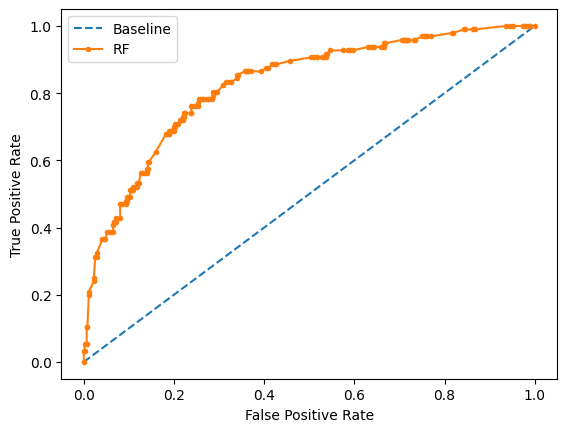

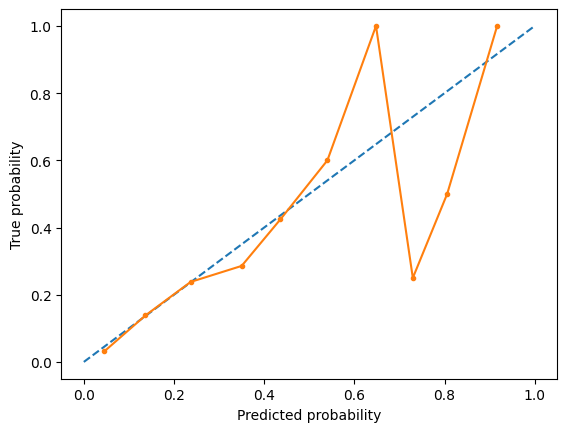

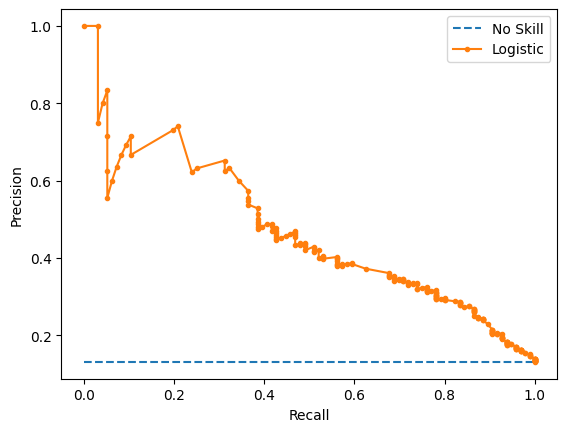

In [13]:
graphs(y_hold, si_testprob)

# Self-harm Models

In [14]:
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_nssi.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_nssi.csv')

In [15]:
np.average(y_hold)

0.07681755829903979

In [16]:
Xi.shape
Xi_hold.shape
y.shape
y_hold.shape

(1699, 1011)

(729, 1011)

(1699, 1)

(729, 1)

In [17]:
searchRF.fit(Xi, y)
searchRF.best_params_

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=26),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [10, 50, 200, 500],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 50, 100, 250,
                                                         500]},
                   random_state=26, scoring='roc_auc')

{'n_estimators': 100, 'min_samples_split': 50, 'max_features': 50}

In [18]:
cRF=CCCV(searchRF.best_estimator_, method='isotonic')
cRF.fit(Xi, y)
joblib.dump(searchRF.best_estimator_, 'RF_nssi_Uncalibrated.sav')
joblib.dump(cRF, 'RF_nssi.sav')

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Docume

CalibratedClassifierCV(estimator=RandomForestClassifier(max_features=50,
                                                        min_samples_split=50,
                                                        n_jobs=-1,
                                                        random_state=26),
                       method='isotonic')

['RF_nssi_Uncalibrated.sav']

['RF_nssi.sav']

In [19]:
cRF=joblib.load('RF_nssi.sav')
nssi_trainprob=predict(Xi)
nssi_testprob=predict(Xi_hold)


Probs: 0.077 (0.114)
Probs: 0.083 (0.099)


In [20]:
ypred, f1, sens, spec, auc=eval(y_hold, nssi_testprob, 0.138621)

F1= 0.359649
Sensitivity= 0.732143
Specificity= 0.805349
AUROC= 0.830198


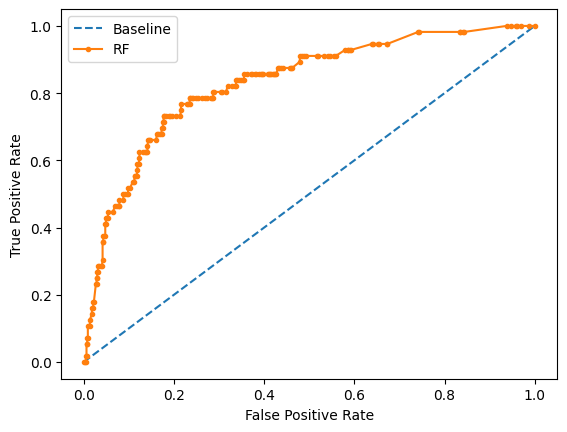

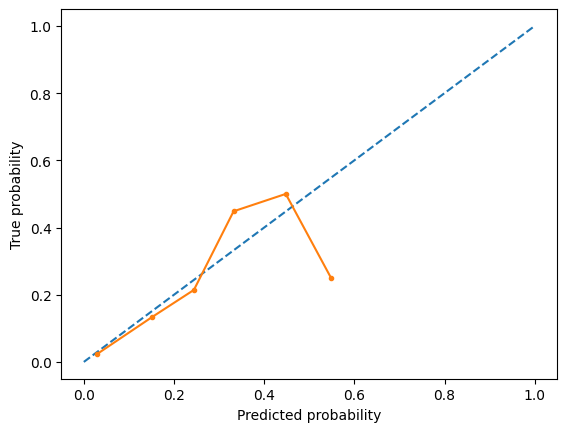

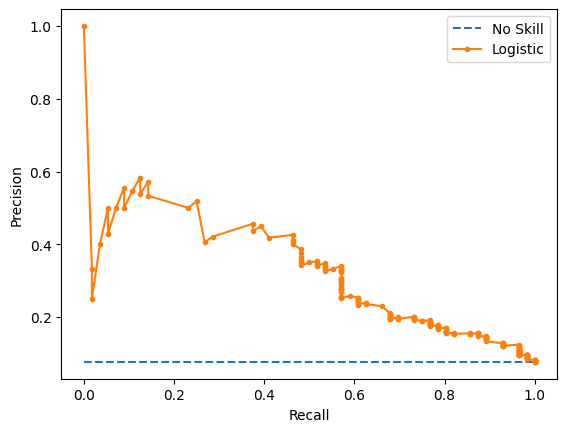

In [21]:
graphs(y_hold, nssi_testprob)

# Attempt Models

In [22]:
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_att.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_att.csv')

In [23]:
np.average(y)

0.0429664508534432

In [24]:
Xi.shape
Xi_hold.shape
y.shape
y_hold_si.shape

(1699, 1011)

(729, 1011)

(1699, 1)

(729, 1)

In [25]:
searchRF.fit(Xi, y)
searchRF.best_params_

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=26),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [10, 50, 200, 500],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 50, 100, 250,
                                                         500]},
                   random_state=26, scoring='roc_auc')

{'n_estimators': 500, 'min_samples_split': 50, 'max_features': 10}

In [26]:
cRF=CCCV(searchRF.best_estimator_, method='isotonic')
cRF.fit(Xi, y)
joblib.dump(searchRF.best_estimator_, 'RF_att_Uncalibrated.sav')
joblib.dump(cRF, 'RF_att.sav')

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Docume

CalibratedClassifierCV(estimator=RandomForestClassifier(max_features=10,
                                                        min_samples_split=50,
                                                        n_estimators=500,
                                                        n_jobs=-1,
                                                        random_state=26),
                       method='isotonic')

['RF_att_Uncalibrated.sav']

['RF_att.sav']

In [27]:
att_trainprob=predict(Xi)
att_testprob=predict(Xi_hold)


Probs: 0.048 (0.097)
Probs: 0.054 (0.081)


In [28]:
ypred, f1, sens, spec, auc=eval(y_hold, att_testprob, 0.074037)

F1= 0.231156
Sensitivity= 0.718750
Specificity= 0.793400
AUROC= 0.857223


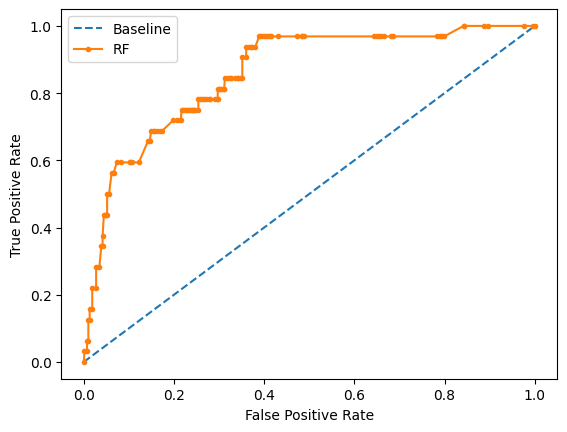

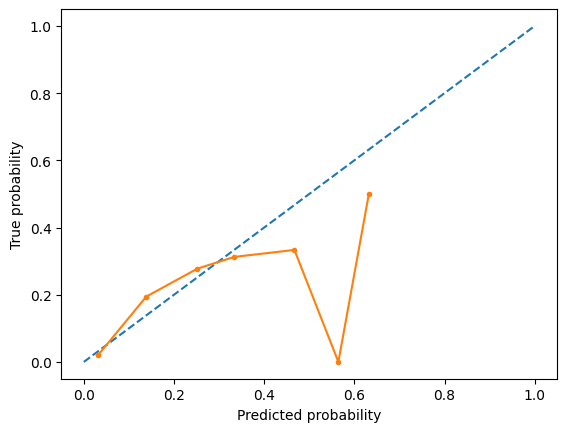

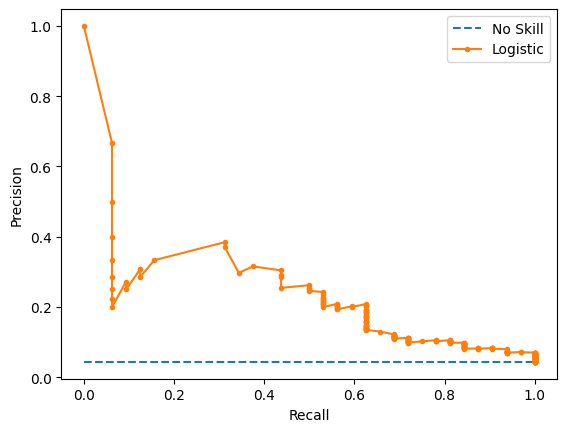

In [29]:
graphs(y_hold, att_testprob)

# SITBs Models

In [30]:
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_sitbs.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_sitbs.csv')

In [31]:
np.average(y_hold)

0.16598079561042525

In [32]:
Xi.shape
Xi_hold.shape
y.shape
y_hold_si.shape

(1699, 1011)

(729, 1011)

(1699, 1)

(729, 1)

In [33]:
searchRF.fit(Xi, y)
searchRF.best_params_

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=26),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [10, 50, 200, 500],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 50, 100, 250,
                                                         500]},
                   random_state=26, scoring='roc_auc')

{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 50}

In [34]:
cRF=CCCV(searchRF.best_estimator_, method='isotonic')
cRF.fit(Xi, y)
joblib.dump(searchRF.best_estimator_, 'RF_sitbs_Uncalibrated.sav')
joblib.dump(cRF, 'RF_sitbs.sav')

c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\z5291979\OneDrive - UNSW\Docume

CalibratedClassifierCV(estimator=RandomForestClassifier(max_features=50,
                                                        n_estimators=500,
                                                        n_jobs=-1,
                                                        random_state=26),
                       method='isotonic')

['RF_sitbs_Uncalibrated.sav']

['RF_sitbs.sav']

In [35]:
sitbs_trainprob=predict(Xi)
sitbs_testprob=predict(Xi_hold)

Probs: 0.185 (0.299)
Probs: 0.176 (0.173)


In [36]:
ypred, f1, sens, spec, auc=eval(y_hold, sitbs_testprob, 0.208806)

F1= 0.486804
Sensitivity= 0.685950
Specificity= 0.774671
AUROC= 0.812860


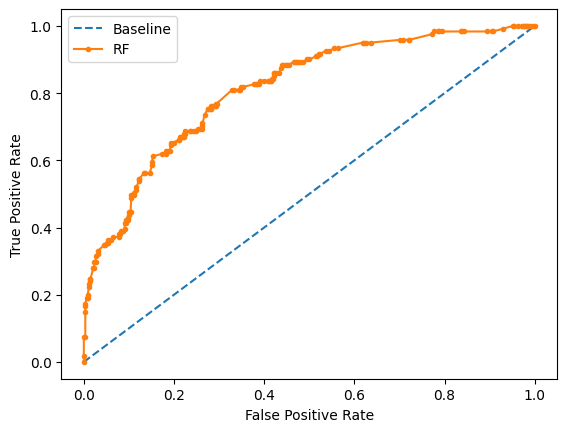

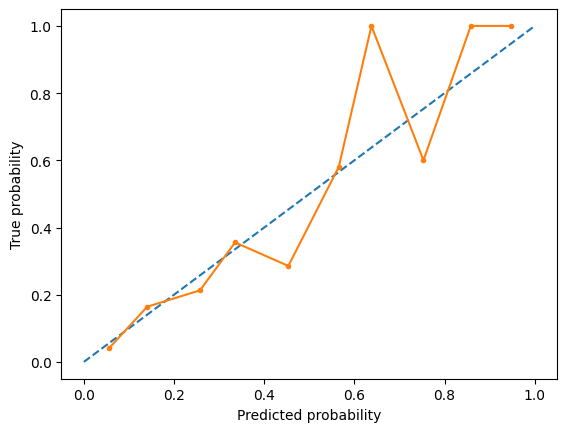

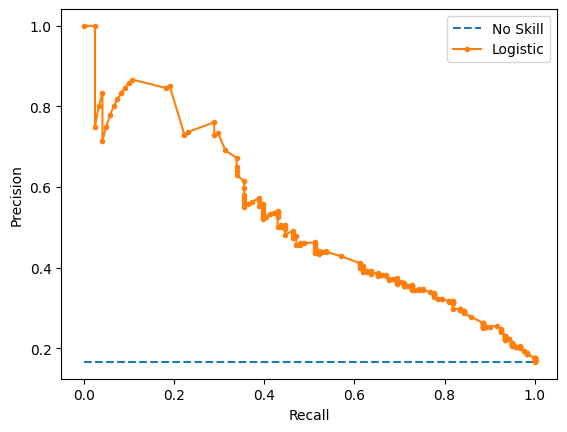

In [37]:
graphs(y_hold, sitbs_testprob)

Graphs

In [38]:
y_hold_si=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_si.csv')
y_hold_nssi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_nssi.csv')
y_hold_att=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_att.csv')
y_hold_sitbs=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_sitbs.csv')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

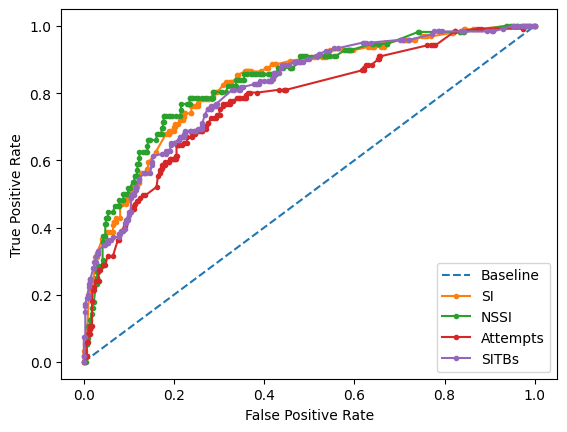

In [39]:
#ROC curve
fpr1, tpr1, thresholds1=roc_curve(y_hold_si, si_testprob)
fpr2, tpr2, thresholds2=roc_curve(y_hold_nssi, nssi_testprob)
fpr3, tpr3, thresholds3=roc_curve(y_hold, att_testprob)
fpr4, tpr4, thresholds4=roc_curve(y_hold, sitbs_testprob)
# plot the roc curve for the model 
pyplot.plot([0,1], [0,1], linestyle='--', label='Baseline')
pyplot.plot(fpr1, tpr1, marker='.', label='SI')
pyplot.plot(fpr2, tpr2, marker='.', label='NSSI')
pyplot.plot(fpr3, tpr3, marker='.', label='Attempts')
pyplot.plot(fpr4, tpr4, marker='.', label='SITBs')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Text(0.5, 0, 'Predicted probability')

Text(0, 0.5, 'True probability')

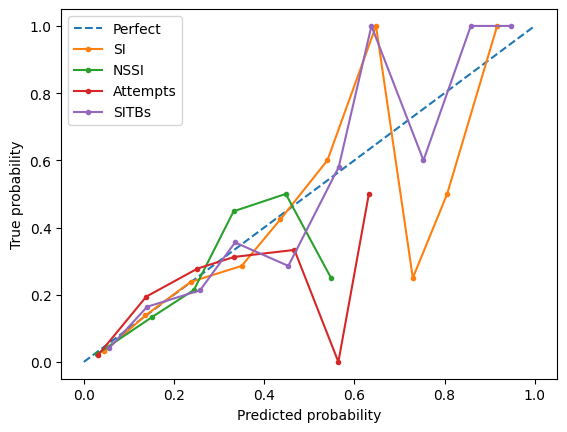

In [40]:
#Calibration curve
# reliability diagram
fop1, mpv1 = calibration_curve(y_hold_si, si_testprob, n_bins=10)
fop2, mpv2 = calibration_curve(y_hold_nssi, nssi_testprob, n_bins=10)
fop3, mpv3 = calibration_curve(y_hold_att, att_testprob, n_bins=10)
fop4, mpv4 = calibration_curve(y_hold_sitbs, sitbs_testprob, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Perfect')
#plot model reliability
pyplot.plot(mpv1, fop1, marker='.', label='SI')
pyplot.plot(mpv2, fop2, marker='.', label='NSSI')
pyplot.plot(mpv3, fop3,  marker='.', label='Attempts')
pyplot.plot(mpv4, fop4, marker='.', label='SITBs')
# plot model reliability
pyplot.xlabel('Predicted probability')
pyplot.ylabel('True probability')
pyplot.legend()
pyplot.show()


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

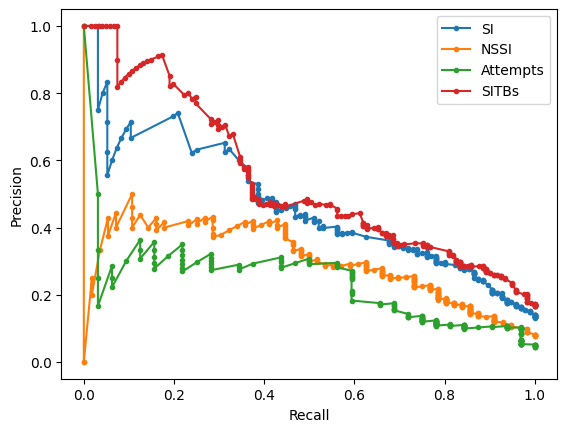

In [41]:
# calculate pr-curve
precision1, recall1, thresholds1 = precision_recall_curve(y_hold_si, si_testprob)
precision2, recall2, thresholds2 = precision_recall_curve(y_hold_nssi, nssi_testprob)
precision3, recall3, thresholds3 = precision_recall_curve(y_hold_att, att_testprob)
precision4, recall4, thresholds4 = precision_recall_curve(y_hold_sitbs, sitbs_testprob)
# plot the roc curve for the model
pyplot.plot(recall1, precision1, marker='.', label='SI')
pyplot.plot(recall2, precision2, marker='.', label='NSSI')
pyplot.plot(recall3, precision3, marker='.', label='Attempts')
pyplot.plot(recall4, precision4, marker='.', label='SITBs')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()